<a href="https://colab.research.google.com/github/nshea3/geostats/blob/master/Libya_paleocene_clastics_thickness/Libya_paleocene_clastics_thickness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geostatistical Analysis of Libyan Clastic Thickness

After [*Geostatistical Analysis of Libyan Clastic Thickness*](http://www.wvgs.wvnet.edu/www/geostat/Libya3.PDF) by Hohn (1999).



In [0]:
import pandas as pd

In [10]:
thickness_df = pd.read_csv('https://raw.githubusercontent.com/nshea3/geostats/master/Libya_paleocene_clastics_thickness/data/appb.txt', delim_whitespace=True, skiprows = 6, names=['Index', 'Easting', 'Northing', 'Thickness'])
thickness_df.head()

,Index,Easting,Northing,Thickness
0,1,0.0,24.0,1848
1,2,2.5,20.0,1806
2,3,4.0,25.0,2220
3,4,1.0,11.0,2513
4,5,6.0,0.0,3209


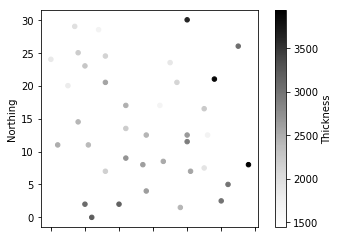

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

ax = thickness_df.plot.scatter('Easting', 'Northing', c='Thickness')
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

In [19]:
!pip install geostatspy

     |████████████████████████████████| 51kB 3.3MB/s 


In [0]:
from geostatspy.geostats import declus

Cell declustering explained via [Clayton Deutsch's Geostatistics Lessons](http://www.geostatisticslessons.com/lessons/celldeclustering.html).

There are 39 data with:
   mean of      2489.897435897436 
   min and max  1439 and 3941
   standard dev 586.624931275023 


(39,)

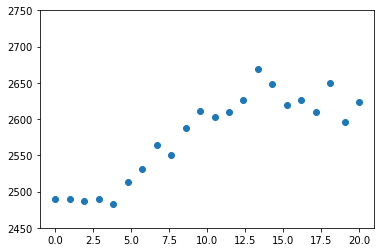

In [65]:
wtopt, xcs_mat, vrcr_mat = declus(thickness_df, 'Easting', 'Northing', 'Thickness', 0, 5, 20, 1, 20)


ax = plt.subplot()
ax.plot(xcs_mat, vrcr_mat, 'o')
ax.set_ylim([2450,2750])

wtopt.shape

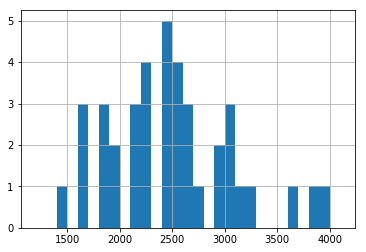

In [66]:
thickness_df['Thickness'].hist(bins=range(1200,4200,100))

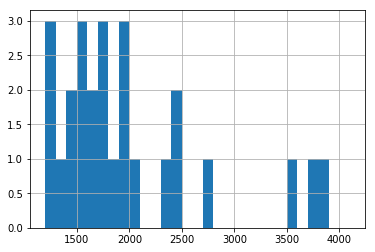

In [77]:
sum_weights = sum(wtopt)
thickness_df['Thickness_weighted'] = thickness_df['Thickness'] * wtopt
thickness_df['Thickness_weighted'].hist(bins=range(1200,4200,100))

(array([17., 11.,  5.,  1.,  2.,  1.,  0.,  0.,  0.,  2.]),
 array([0.44705387, 0.74179293, 1.03653199, 1.33127104, 1.6260101 ,
        1.92074916, 2.21548822, 2.51022727, 2.80496633, 3.09970539,
        3.39444444]),
 <a list of 10 Patch objects>)

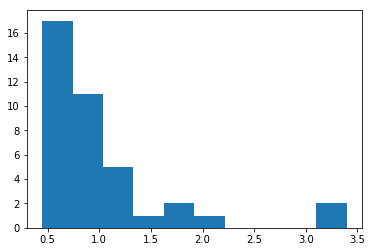

In [70]:
plt.hist(wtopt)